In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
df=pd.read_csv('HR Analytics Job Change of Data Scientists - HR Analytics Job Change of Data Scientists.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.shape

(19158, 14)

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [8]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0


In [9]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [10]:
df['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

In [11]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [12]:
df['gender'].isnull().sum()

np.int64(0)

In [13]:
for col in df.columns:
    if df[col].isnull().sum()>0:
      df[col].fillna(df[col].mode()[0],inplace=True)
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [14]:
#1.What is the average training hours by gender, and how can we visualize it using a bar plot?
avg_training_hours_by_gender = df.groupby('gender')['training_hours'].mean().reset_index()
avg_training_hours_by_gender

,gender,training_hours
0,Female,65.636511
1,Male,65.364206
2,Other,63.869110


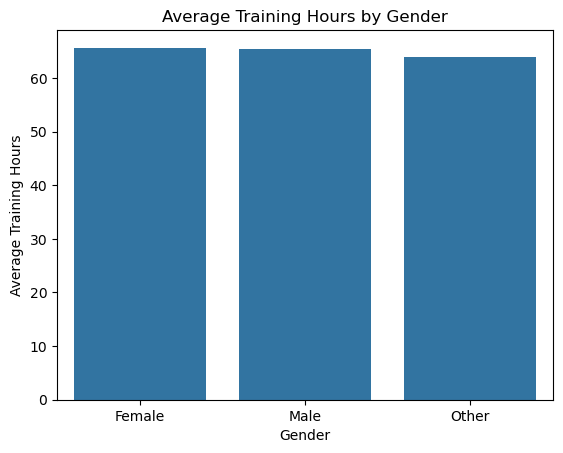

In [15]:
sns.barplot(x='gender', y='training_hours', data=avg_training_hours_by_gender)
plt.title('Average Training Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Training Hours')
plt.show()

In [16]:
#2.Visualize standard deviation of training hours by education level using a seaborn barplot.
std_training_hours_by_education = df.groupby('education_level')['training_hours'].std().reset_index()
std_training_hours_by_education

,education_level,training_hours
0,Graduate,60.548965
1,High School,59.307288
2,Masters,57.955434
3,Phd,66.743324
4,Primary School,64.889434


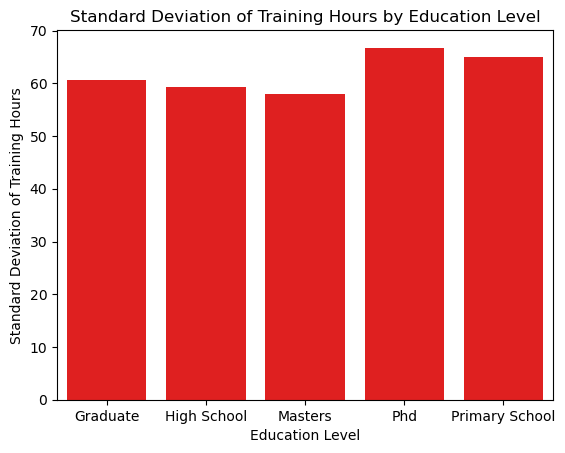

In [17]:
sns.barplot(x='education_level', y='training_hours', data=std_training_hours_by_education,color='red')
plt.title('Standard Deviation of Training Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Standard Deviation of Training Hours')
plt.show()

In [18]:
#3.Display and plot the count of people by gender and company type using unstack + heatmap.
gender_company_counts = df.groupby(['gender', 'company_type']).size().unstack()
gender_company_counts

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
gender,,,,,,
Female,41,92,54,12,97,942
Male,559,897,463,108,849,14853
Other,3,12,4,1,9,162


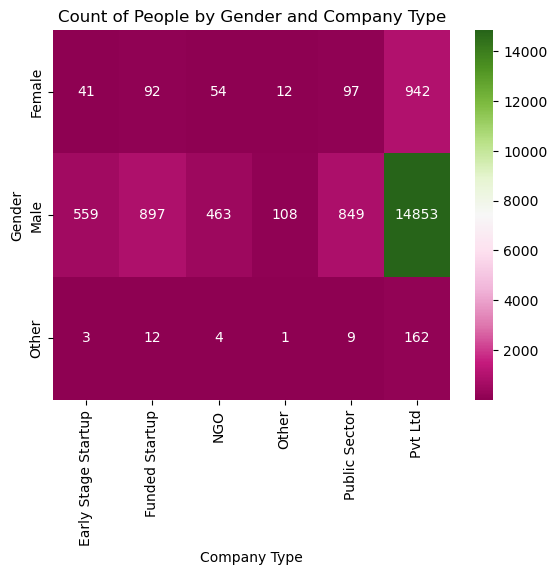

In [19]:
sns.heatmap(gender_company_counts, annot=True,fmt='d',cmap='PiYG')
plt.title('Count of People by Gender and Company Type')
plt.xlabel('Company Type')
plt.ylabel('Gender')
plt.show()

In [20]:
#4.Create a pivot table of average training hours by education level and gender, then heatmap it.
avg_training_hours_pivot = df.pivot_table(values='training_hours', index='education_level', columns='gender', aggfunc='mean')
avg_training_hours_pivot

gender,Female,Male,Other
education_level,,,
Graduate,66.295775,65.845375,65.950413
High School,63.970149,66.845070,62.636364
Masters,64.793510,63.184731,56.888889
Phd,66.638298,67.506887,79.500000
Primary School,24.500000,64.432886,49.666667


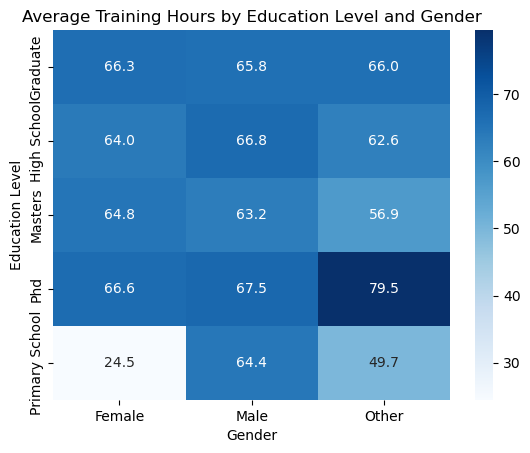

In [21]:
sns.heatmap(avg_training_hours_pivot, annot=True,fmt='.1f',cmap='Blues')
plt.title('Average Training Hours by Education Level and Gender')
plt.xlabel('Gender')
plt.ylabel('Education Level')
plt.show()

In [22]:
#5.Use a crosstab to analyze enrolled university vs education level, and visualize with bar plot.
crosstab_enrolled_education = pd.crosstab(df['enrolled_university'], df['education_level'])
crosstab_enrolled_education

education_level,Graduate,High School,Masters,Phd,Primary School
enrolled_university,,,,,
Full time course,2278,864,557,25,33
Part time course,805,166,204,12,11
no_enrollment,8975,987,3600,377,264


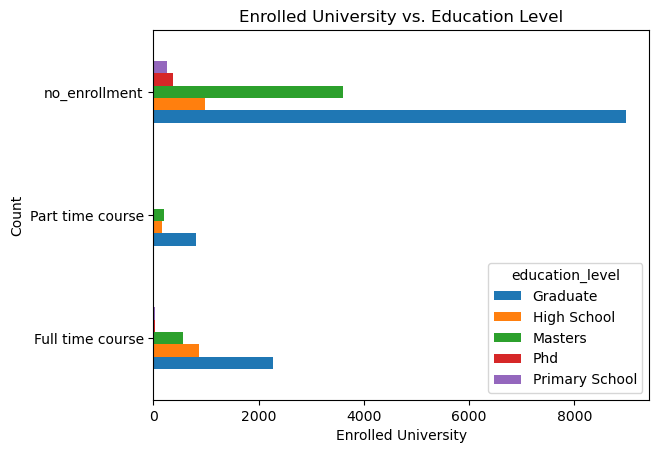

In [23]:
crosstab_enrolled_education.plot(kind='barh')
plt.title('Enrolled University vs. Education Level')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.show()

In [24]:
#6.Show and plot average city development index by company size.
avg_city_development_by_company_size = df.groupby('company_size')['city_development_index'].mean().reset_index()
avg_city_development_by_company_size

,company_size,city_development_index
0,10/49,0.813927
1,100-500,0.835129
2,1000-4999,0.857128
3,10000+,0.846206
4,50-99,0.820013
5,500-999,0.836881
6,5000-9999,0.849064
7,<10,0.824622


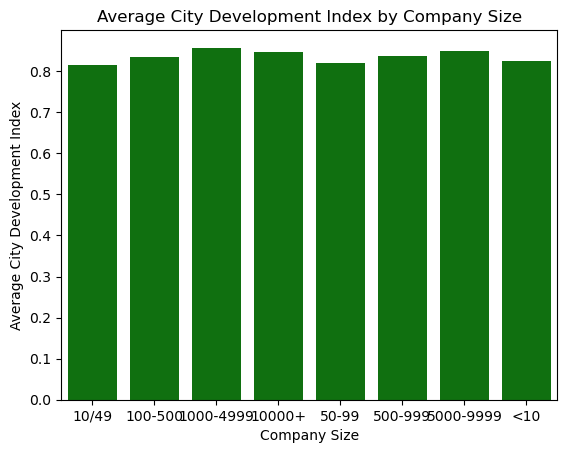

In [25]:
sns.barplot(x='company_size', y='city_development_index', data=avg_city_development_by_company_size,color='green')
plt.title('Average City Development Index by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average City Development Index')
plt.show()

In [26]:
#7.Use sort_index() to plot average training hours by company size.
avg_training_hours_by_company_size = df.groupby('company_size')['training_hours'].mean().sort_index()
avg_training_hours_by_company_size

company_size
10/49        66.925901
100-500      63.984442
1000-4999    64.621235
10000+       64.523526
50-99        65.898903
500-999      64.282782
5000-9999    64.543517
<10          65.801988
Name: training_hours, dtype: float64

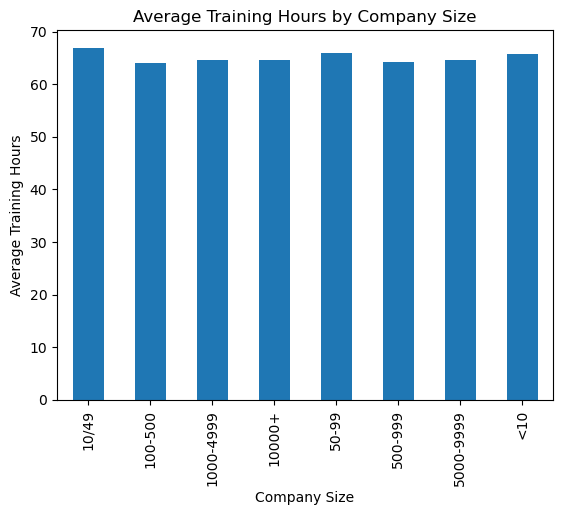

In [27]:
avg_training_hours_by_company_size.plot(kind='bar')
plt.title('Average Training Hours by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Training Hours')
plt.show()

In [28]:
#8.Plot standard deviation of city development index by last_new_job using seaborn.
std_city_development_by_last_new_job = df.groupby('last_new_job')['city_development_index'].std().reset_index()
std_city_development_by_last_new_job

,last_new_job,city_development_index
0,1,0.127679
1,2,0.118941
2,3,0.111547
3,4,0.109121
4,>4,0.097325
5,never,0.135159


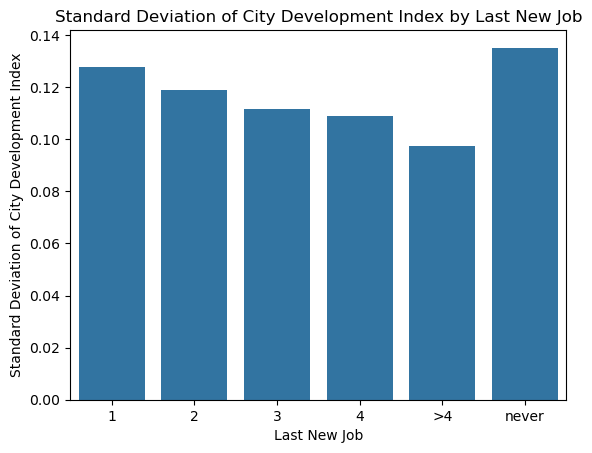

In [29]:
sns.barplot(x='last_new_job', y='city_development_index', data=std_city_development_by_last_new_job)
plt.title('Standard Deviation of City Development Index by Last New Job')
plt.xlabel('Last New Job')
plt.ylabel('Standard Deviation of City Development Index')
plt.show()

In [30]:
#9.Count people who changed jobs (target=1) by gender, and visualize.
job_change_by_gender = df[df['target'] == 1]['gender'].value_counts().reset_index()
job_change_by_gender.columns = ['gender', 'count']
job_change_by_gender

,gender,count
0,Male,4401
1,Female,326
2,Other,50


<Axes: xlabel='gender', ylabel='count'>

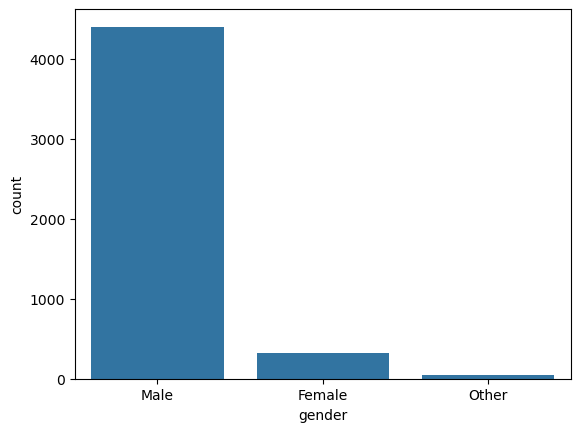

In [31]:
sns.barplot(x='gender', y='count', data=job_change_by_gender)

In [32]:
#10.Heatmap of job change rate by major discipline and education level (pivot + heatmap).
job_change_rate_pivot = df.pivot_table(values='target', index='major_discipline', columns='education_level', aggfunc='mean')
job_change_rate_pivot

education_level,Graduate,High School,Masters,Phd,Primary School
major_discipline,,,,,
Arts,0.182692,NaN,0.333333,0.333333,NaN
Business Degree,0.268908,NaN,0.255814,0.000000,NaN
Humanities,0.230952,NaN,0.177778,0.166667,NaN
No Major,0.257732,NaN,0.172414,NaN,NaN
Other,0.305147,NaN,0.180000,0.111111,NaN
STEM,0.281279,0.19534,0.215519,0.138667,0.133117


<Axes: xlabel='education_level', ylabel='major_discipline'>

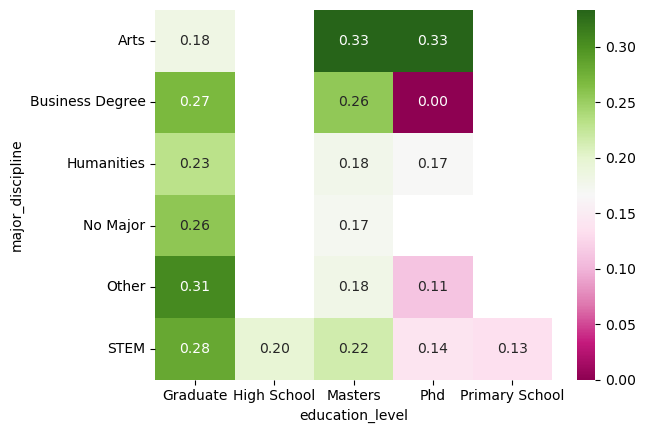

In [33]:
sns.heatmap(job_change_rate_pivot, annot=True, fmt='.2f',cmap='PiYG')

In [34]:
#11.Crosstab of experience vs target, plotted as stacked bar.
crosstab_experience_target = pd.crosstab(df['experience'], df['target'])
crosstab_experience_target

target,0,1
experience,,
1,316,233
10,778,207
11,513,151
12,402,92
13,322,77
14,479,107
15,572,114
16,436,72
17,285,57


<Axes: xlabel='experience'>

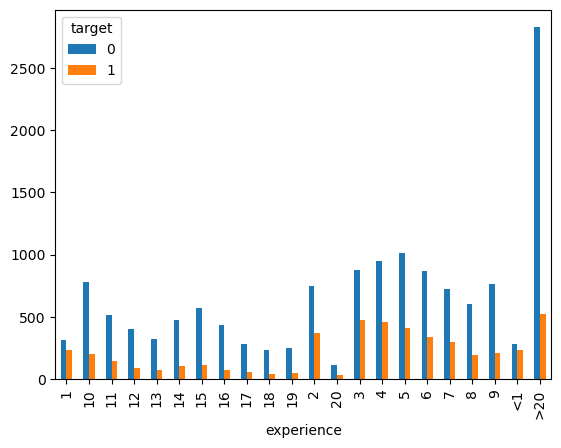

In [35]:
crosstab_experience_target.plot(kind='bar')

In [36]:
# 12. Group by company_type and education_level using unstack, then show as heatmap
company_education_counts = df.groupby(['company_type', 'education_level']).size().unstack()
company_education_counts

education_level,Graduate,High School,Masters,Phd,Primary School
company_type,,,,,
Early Stage Startup,382,52,152,10,7
Funded Startup,682,54,233,25,7
NGO,307,29,150,33,2
Other,83,11,25,1,1
Public Sector,493,65,296,97,4
Pvt Ltd,10111,1806,3505,248,287


<Axes: xlabel='education_level', ylabel='company_type'>

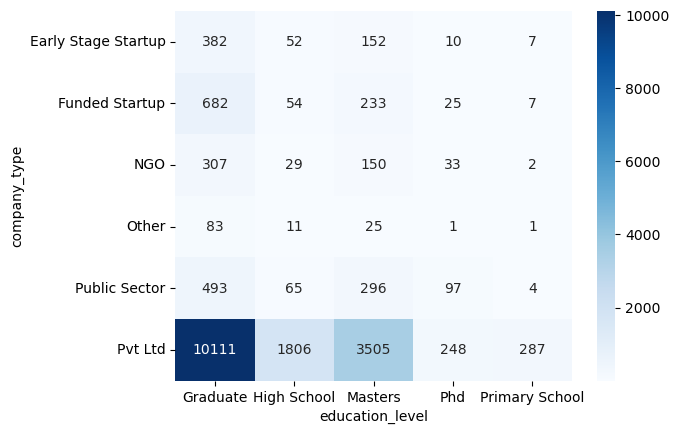

In [37]:
sns.heatmap(company_education_counts, annot=True, fmt='d', cmap='Blues')

In [38]:
#13. Pivot: training_hours by last_new_job and gender, then heatmap.
avg_training_hours_pivot_last_job_gender = df.pivot_table(values='training_hours', index='last_new_job', columns='gender', aggfunc='mean')
avg_training_hours_pivot_last_job_gender

gender,Female,Male,Other
last_new_job,,,
1,64.104651,65.904860,65.216867
2,67.619792,65.800224,51.920000
3,71.612903,64.560000,70.500000
4,66.597015,66.181532,47.777778
>4,67.559585,64.127687,62.814815
never,63.467213,64.669717,71.885714


<Axes: xlabel='gender', ylabel='last_new_job'>

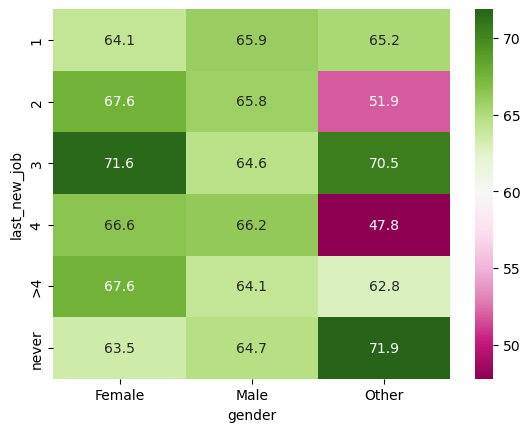

In [39]:
sns.heatmap(avg_training_hours_pivot_last_job_gender, annot=True, fmt='.1f',cmap='PiYG')

In [40]:
#14. Normalized crosstab of company_size vs target with seaborn barplot
normalized_crosstab_company_target = pd.crosstab(df['company_size'], df['target'], normalize='index')
normalized_crosstab_company_target

target,0,1
company_size,,
10/49,0.766145,0.233855
100-500,0.838584,0.161416
1000-4999,0.849398,0.150602
10000+,0.809312,0.190688
50-99,0.672431,0.327569
500-999,0.826682,0.173318
5000-9999,0.818828,0.181172
<10,0.828746,0.171254


<Axes: xlabel='company_size'>

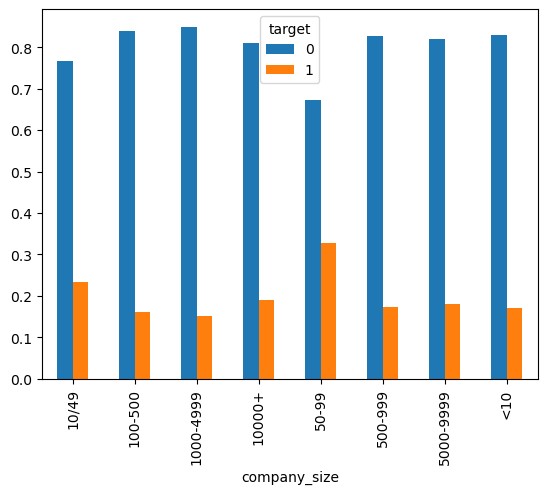

In [41]:
normalized_crosstab_company_target.plot(kind='bar')

In [42]:
#15.Plot standard deviation of training_hours by company_type
std_training_hours_by_company_type = df.groupby('company_type')['training_hours'].std().reset_index()
std_training_hours_by_company_type

,company_type,training_hours
0,Early Stage Startup,63.257722
1,Funded Startup,61.016137
2,NGO,64.469137
3,Other,59.942194
4,Public Sector,56.681681
5,Pvt Ltd,59.916391


<Axes: xlabel='company_type', ylabel='training_hours'>

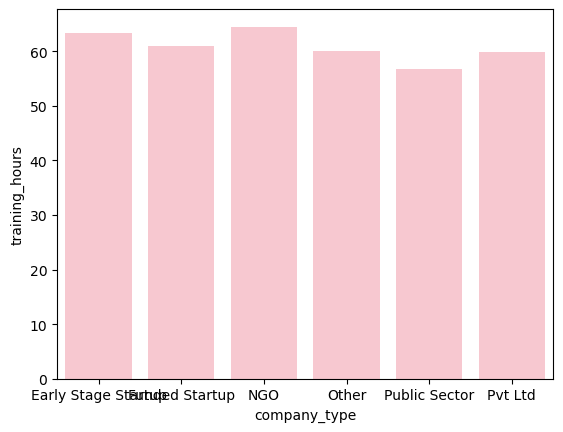

In [43]:
sns.barplot(x='company_type', y='training_hours', data=std_training_hours_by_company_type,color='pink')

In [44]:
#16. Plot mean city development index by gender and education level using heatmap
avg_city_development_pivot = df.pivot_table(values='city_development_index', index='education_level', columns='gender', aggfunc='mean')
avg_city_development_pivot

gender,Female,Male,Other
education_level,,,
Graduate,0.843763,0.821109,0.865785
High School,0.829522,0.833515,0.864545
Masters,0.842811,0.835020,0.886889
Phd,0.894489,0.883468,0.712750
Primary School,0.869250,0.849265,0.895167


<Axes: xlabel='gender', ylabel='education_level'>

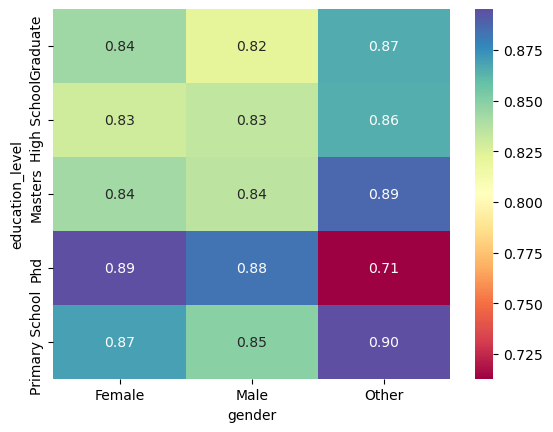

In [45]:
sns.heatmap(avg_city_development_pivot,annot=True,fmt='.2f',cmap='Spectral')

In [46]:
#17. Median training_hours by university and gender, visualized
median_training_hours_pivot = df.pivot_table(values='training_hours', index='enrolled_university', columns='gender', aggfunc='median')
median_training_hours_pivot

gender,Female,Male,Other
enrolled_university,,,
Full time course,51.0,46.0,40.5
Part time course,45.0,47.0,58.0
no_enrollment,48.0,47.0,48.0


<Axes: xlabel='gender', ylabel='enrolled_university'>

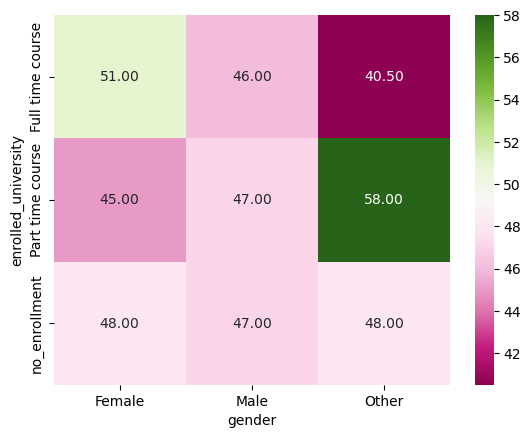

In [47]:
sns.heatmap(data=median_training_hours_pivot,annot=True,fmt='.2f',cmap='PiYG')

In [48]:
#18. Crosstab: company_type vs last_new_job with stacked bar plot.
crosstab_company_last_job = pd.crosstab(df['company_type'], df['last_new_job'])
crosstab_company_last_job

last_new_job,1,2,3,4,>4,never
company_type,,,,,,
Early Stage Startup,382,90,22,27,30,52
Funded Startup,612,194,55,56,65,19
NGO,271,65,26,28,108,23
Other,53,19,6,4,31,8
Public Sector,376,191,73,48,215,52
Pvt Ltd,6769,2341,842,866,2841,2298


<Axes: ylabel='company_type'>

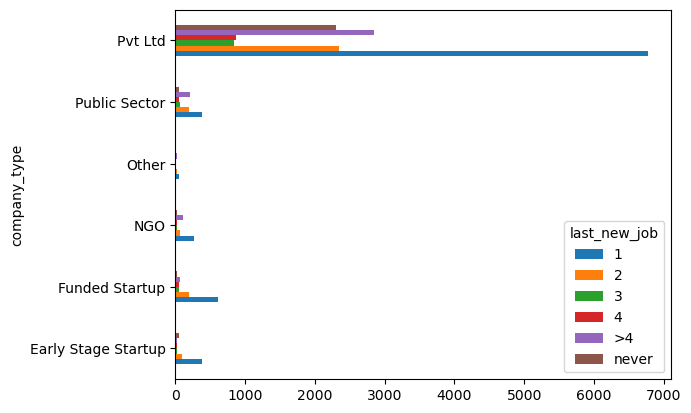

In [49]:
crosstab_company_last_job.plot(kind='barh')

In [50]:
# 19.maximum training_hours by gender plotted with barplot
max_training_hours=df.groupby('gender')['training_hours'].max()
max_training_hours

gender
Female    332
Male      336
Other     306
Name: training_hours, dtype: int64

<Axes: xlabel='gender', ylabel='training_hours'>

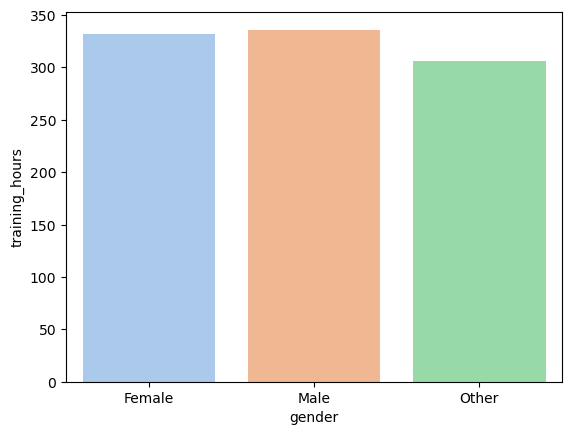

In [51]:
sns.barplot(max_training_hours,palette='pastel')

In [52]:
# 20. Heatmap: training_hours by target and company_size
avg_training_hours_pivot_target_company = df.pivot_table(values='training_hours', index='company_size', columns='target', aggfunc='mean')
avg_training_hours_pivot_target_company

target,0,1
company_size,,
10/49,68.758651,60.921512
100-500,63.750000,65.202410
1000-4999,63.765957,69.445000
10000+,64.630967,64.067532
50-99,67.261787,63.101184
500-999,65.536552,58.302632
5000-9999,65.544469,60.019608
<10,66.947417,60.258929


<Axes: xlabel='target', ylabel='company_size'>

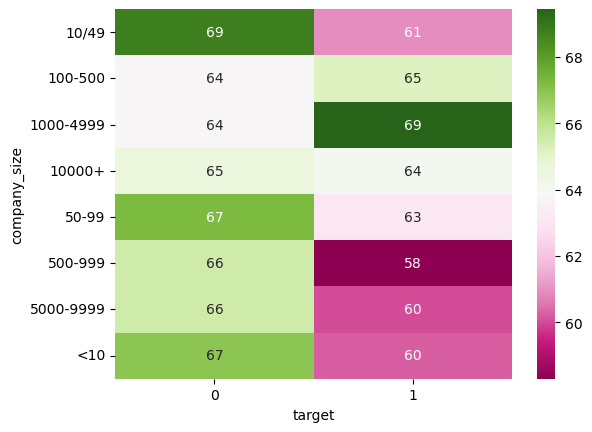

In [53]:
sns.heatmap(avg_training_hours_pivot_target_company,annot=True,cmap='PiYG')

In [54]:
'''21. Count people per major discipline and gender, shown as heatmap.
22. Compare std of city index for each education level using horizontal bar chart.
23. Visualize average job change rate by experience using a line plot'''
count_data=df.groupby(['major_discipline','gender']).size().unstack()
count_data

gender,Female,Male,Other
major_discipline,,,
Arts,36,210,7
Business Degree,25,299,3
Humanities,118,543,8
No Major,16,204,3
Other,36,338,7
STEM,1007,16135,163


<Axes: xlabel='gender', ylabel='major_discipline'>

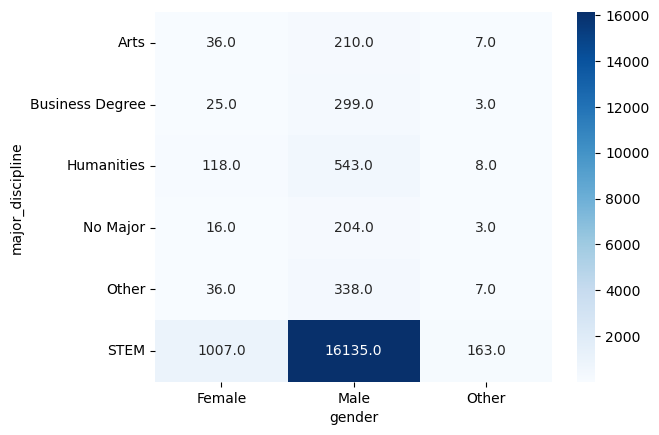

In [55]:
sns.heatmap(count_data,annot=True,fmt='.1f',cmap='Blues')

In [56]:
std_data=df.groupby('education_level')['city_development_index'].std().reset_index()
std_data

,education_level,city_development_index
0,Graduate,0.127503
1,High School,0.118761
2,Masters,0.115828
3,Phd,0.081334
4,Primary School,0.111571


<Axes: >

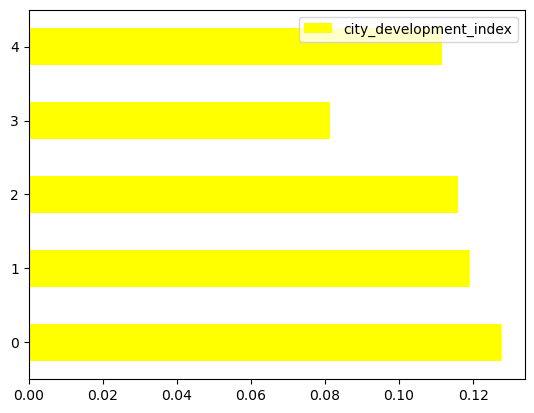

In [57]:
std_data.plot(kind='barh',color='yellow')

In [58]:
avg_job_change_rate_by_experience = df.groupby('experience')['target'].mean().reset_index()
avg_job_change_rate_by_experience

,experience,target
0,1,0.424408
1,10,0.210152
2,11,0.227410
3,12,0.186235
4,13,0.192982
5,14,0.182594
6,15,0.166181
7,16,0.141732
8,17,0.166667
9,18,0.153571


<Axes: xlabel='experience', ylabel='target'>

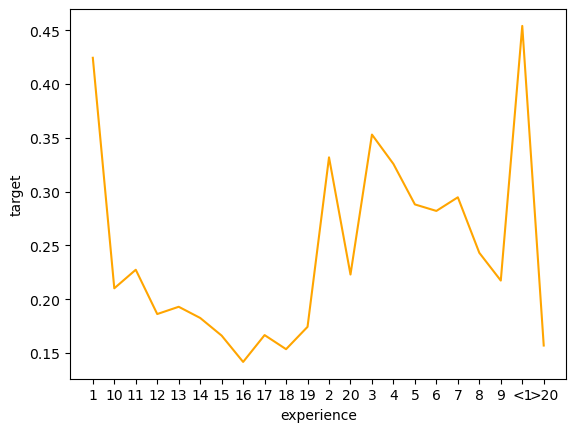

In [59]:
sns.lineplot(x='experience', y='target', data=avg_job_change_rate_by_experience,color='orange')

In [60]:
#24. Pivot training_hours by education and target, heatmap the result.
avg_training_hours_pivot_education_target = df.pivot_table(values='training_hours', index='education_level', columns='target', aggfunc='mean')
avg_training_hours_pivot_education_target

target,0,1
education_level,,
Graduate,66.742450,63.621380
High School,66.619840,66.931472
Masters,64.073847,60.328342
Phd,68.379213,62.275862
Primary School,65.685393,50.219512


<Axes: xlabel='target', ylabel='education_level'>

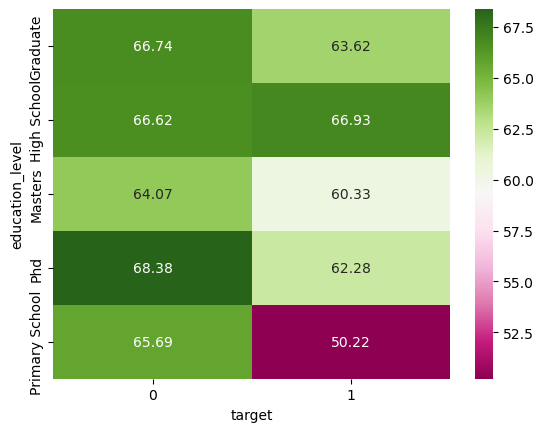

In [61]:
sns.heatmap(avg_training_hours_pivot_education_target,annot=True,fmt='.2f',cmap='PiYG')

In [62]:
#25. Crosstab of gender vs target, bar plot with Seaborn.
crosstab_gender_target = pd.crosstab(df['gender'], df['target'])
crosstab_gender_target

target,0,1
gender,,
Female,912,326
Male,13328,4401
Other,141,50


<Axes: xlabel='gender'>

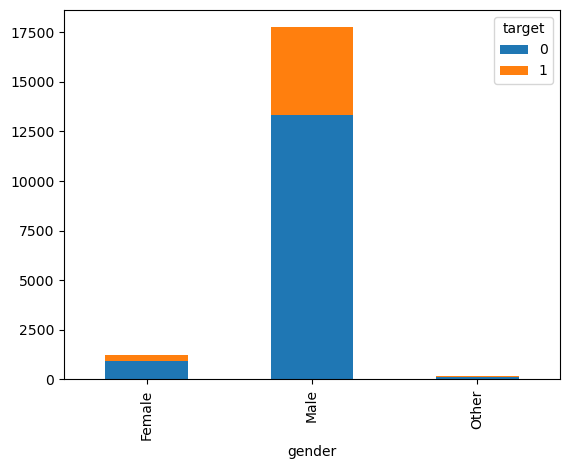

In [63]:
crosstab_gender_target.plot(kind='bar', stacked=True)

In [64]:
#26. Use unstack to analyze gender & enrolled_university and heatmap.
gender_university_counts = df.groupby(['gender', 'enrolled_university']).size().unstack()
gender_university_counts

enrolled_university,Full time course,Part time course,no_enrollment
gender,,,
Female,216,65,957
Male,3493,1115,13121
Other,48,18,125


<Axes: xlabel='enrolled_university', ylabel='gender'>

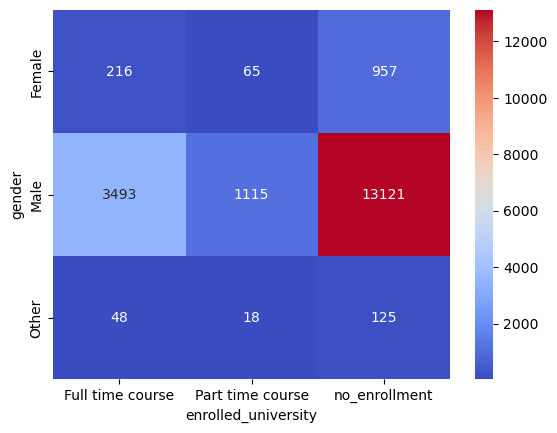

In [65]:
sns.heatmap(gender_university_counts,annot=True,fmt='d',cmap='coolwarm')

<Axes: xlabel='education_level', ylabel='training_hours'>

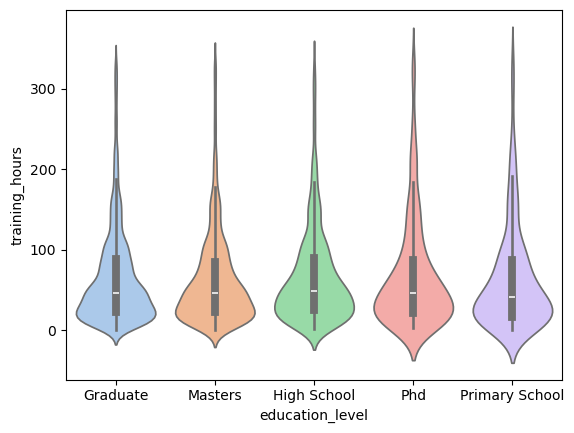

In [66]:
#27.Violin plot of training hours by education level
sns.violinplot(x='education_level', y='training_hours', data=df,palette='pastel')

<Axes: xlabel='city_development_index', ylabel='Count'>

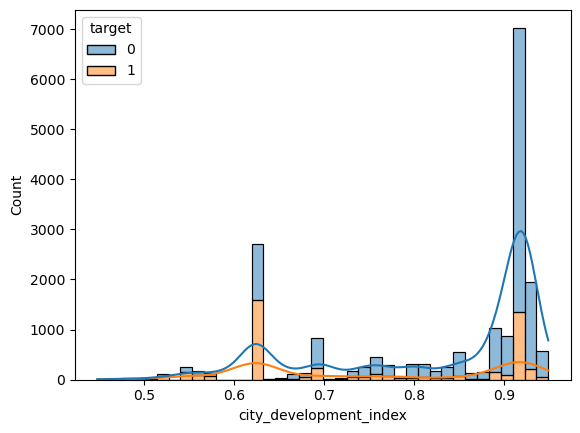

In [67]:
#28.Histogram of city index by job change target.
sns.histplot(data=df, x='city_development_index', hue='target', kde=True, multiple='stack')

In [68]:
#29. Heatmap of target (mean) by gender and major_discipline
avg_job_change_rate_pivot_gender_major = df.pivot_table(values='target', index='major_discipline', columns='gender', aggfunc='mean')
avg_job_change_rate_pivot_gender_major

gender,Female,Male,Other
major_discipline,,,
Arts,0.250000,0.200000,0.285714
Business Degree,0.280000,0.264214,0.000000
Humanities,0.237288,0.204420,0.250000
No Major,0.500000,0.230392,0.000000
Other,0.277778,0.269231,0.142857
STEM,0.262165,0.249830,0.276074


<Axes: xlabel='gender', ylabel='major_discipline'>

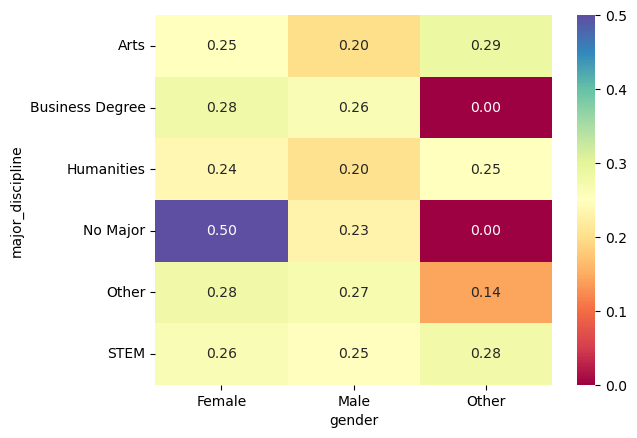

In [69]:
sns.heatmap(avg_job_change_rate_pivot_gender_major, annot=True, fmt='.2f', cmap='Spectral')

<Axes: xlabel='company_type', ylabel='training_hours'>

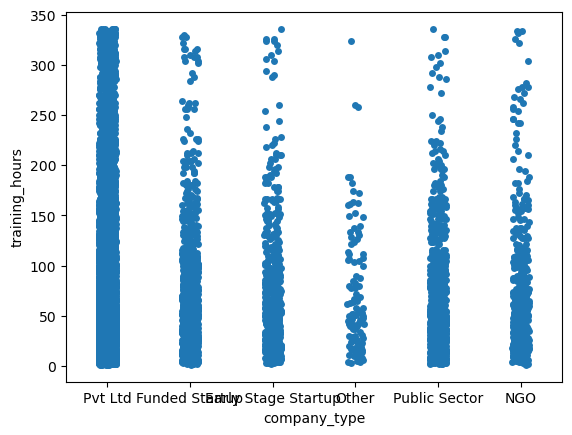

In [71]:
#30. Stripplot of training hours by company type
sns.stripplot(x='company_type', y='training_hours', data=df)